In [122]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import math

In [123]:
rt_data = np.loadtxt("RT-Transmission-Data/RTdata.csv", delimiter=",")

In [124]:
# equation for m values
m = 2.1731*10000*2*math.pi*1/1547.4
print(m)
m = 2.1731*10000*2*math.pi*1/1550
print(m)

88.23827058958224
88.09025800665779


In [125]:
x = rt_data[:,0] 
del_lam = rt_data[:,1]

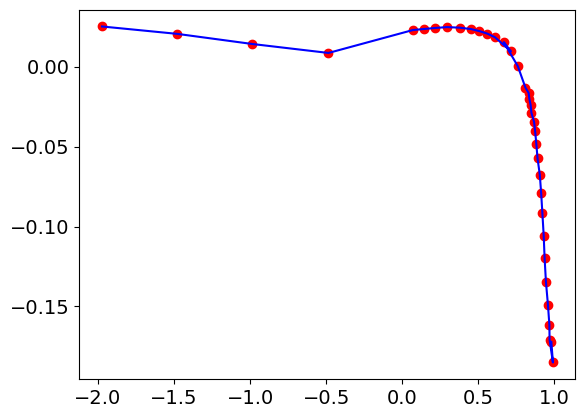

In [126]:


#y = func(x, -0.00005, 1.3, 0.05)
#rng = np.random.default_rng()
#y_noise = 0.2 * rng.normal(size=x.size)
#ydata = y + y_noise

plt.plot(x, del_lam, 'ro', label='data')
plt.plot(x, del_lam, 'b-', label='data')
#plt.plot(x, ydata, 'b-', label='data')
plt.show()

In [127]:
R = 10000 #in nm
#n_eff = 3.453 - 1.13*del_lam - 0.04*del_lam**2
del_n_eff = del_lam*88/(2*np.pi*R)

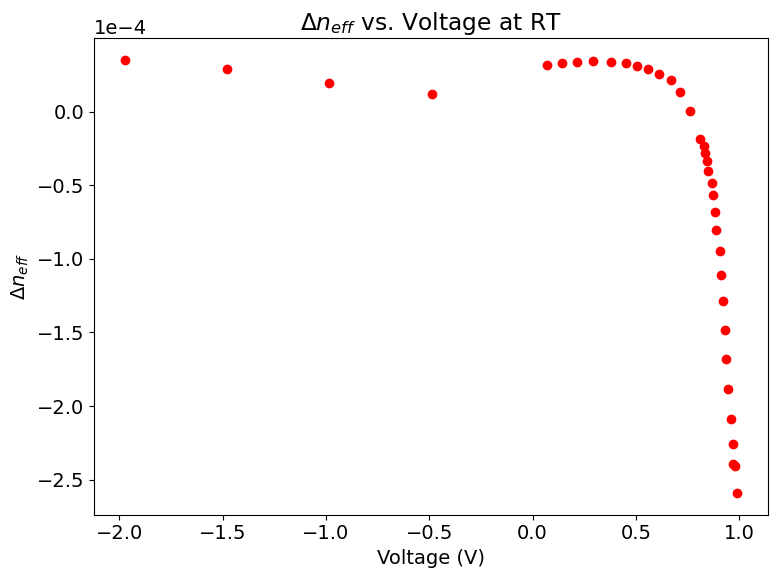

In [128]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
plt.plot(x, del_n_eff, 'ro', label='data')
#plt.plot(x, del_n_eff, 'b-', label='data')
plt.title("$\\Delta n_{eff}$ vs. Voltage at RT")
plt.xlabel("Voltage (V)")
plt.ylabel("$\\Delta n_{eff}$")
plt.ticklabel_format(style = 'sci', axis = 'y', scilimits = (0,0))
#plt.plot(x, ydata, 'b-', label='data')
plt.tight_layout()
plt.savefig("RTDelNeff.png")
plt.show()

In [129]:
np.savetxt("FinalCSVs/RTDneff.csv", np.c_[x, del_n_eff], delimiter = ",")

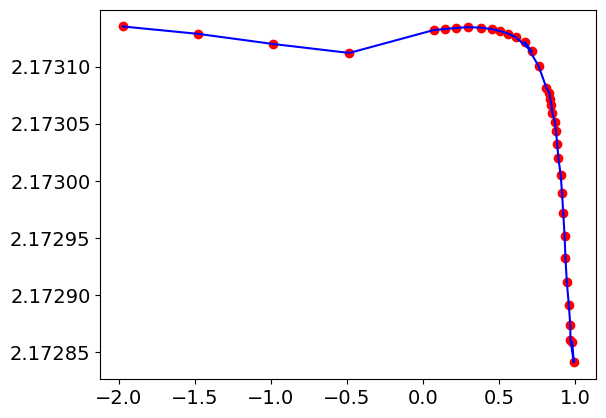

In [130]:
n_eff = 2.1731 + del_n_eff

plt.plot(x, n_eff, 'ro', label='data')
plt.plot(x, n_eff, 'b-', label='data')
#plt.plot(x, ydata, 'b-', label='data')
plt.show()

In [131]:
print(x) #print voltages

[-1.97403744 -1.48062355 -0.98633536 -0.48487238  0.07004876  0.14255237
  0.21461676  0.29369545  0.37771093  0.45225654  0.50746267  0.55859501
  0.60933997  0.71524573  0.66811206  0.76018089  0.81042849  0.83112928
  0.83573866  0.84425471  0.8496694   0.86695503  0.87395199  0.88212984
  0.88961692  0.9047326   0.91354508  0.92176116  0.93041926  0.93635167
  0.94494584  0.95825192  0.96764063  0.96894944  0.99101431  0.9804735 ]


In [132]:
np.savetxt("voltages.csv", x, delimiter = ",")

In [133]:
print(x[16],n_eff[16])

0.8104284941505213 2.1730815115026925


In [134]:
fit_neff = [2.16724686,2.1672266,2.16720391,2.16718742,2.16716579,2.1671228,2.16709665]
fit_neff = np.array(fit_neff)
voltages = [-2,-1,0,0.5,0.7,0.8,0.85]

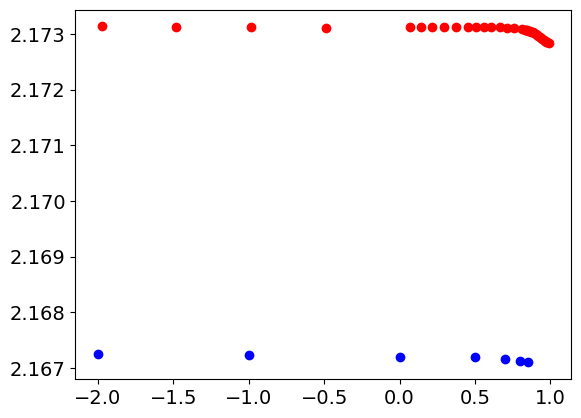

In [135]:
n_eff = 2.1731 + del_n_eff

plt.plot(x, n_eff, 'ro', label='data')
plt.plot(voltages, fit_neff, 'bo', label='data')
#plt.plot(x, ydata, 'b-', label='data')
plt.show()

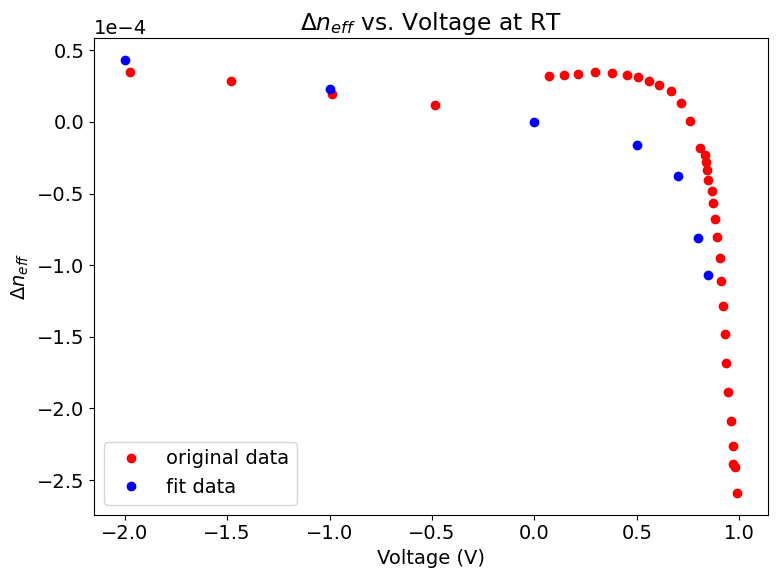

In [136]:
del_fit_neff = fit_neff - 2.16720363
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
plt.plot(x, del_n_eff, 'ro', label='original data')
plt.plot(voltages, del_fit_neff, 'bo', label='fit data')
plt.title("$\\Delta n_{eff}$ vs. Voltage at RT")
plt.xlabel("Voltage (V)")
plt.ylabel("$\\Delta n_{eff}$")
plt.legend()

plt.ticklabel_format(style = 'sci', axis = 'y', scilimits = (0,0))
plt.tight_layout()
plt.savefig("RTFitCheck.png")
#plt.plot(x, ydel_data, 'b-', label='data')
plt.show()

In [137]:
print(voltages)

[-2, -1, 0, 0.5, 0.7, 0.8, 0.85]


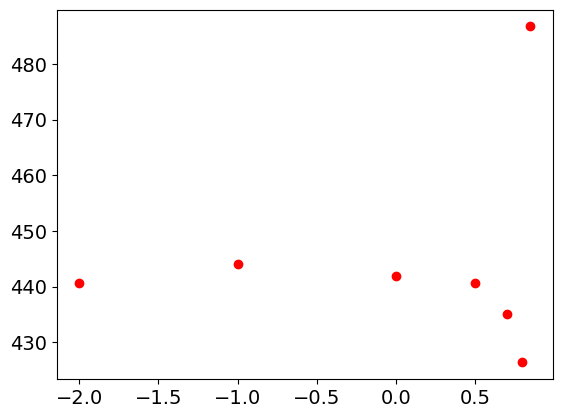

In [138]:
alpha = np.array([440.5916694, 444.04999354,  441.97689195, 440.6855955, 435.03637563, 426.3509729, 486.7188699])

plt.plot(voltages, alpha, 'ro', label='data')
#plt.plot(x, del_lam, 'b-', label='data')
#plt.plot(x, ydata, 'b-', label='data')
plt.show()

In [139]:
#saving this to a csv file
np.savetxt("FinalCSVs/RTAbsorb.csv", np.c_[voltages, alpha], delimiter = ",")

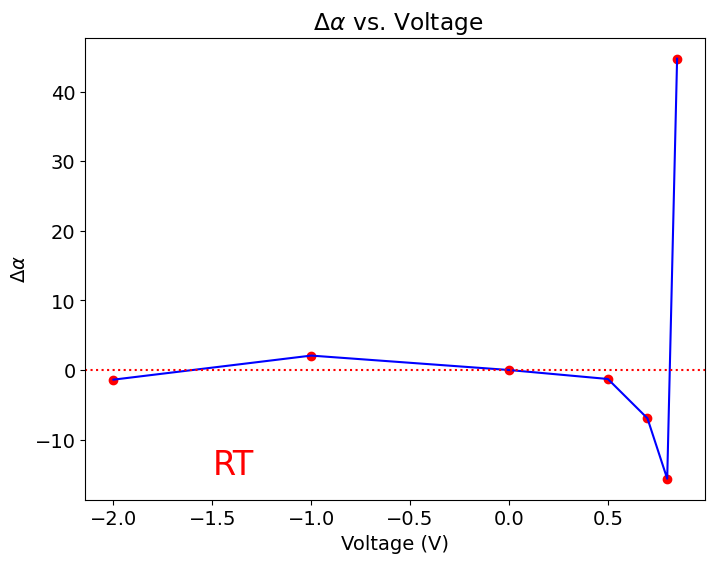

In [140]:
Dalpha = alpha - alpha[2]

plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
plt.tight_layout()
plt.plot(voltages, Dalpha, 'ro', label='data')
plt.plot(voltages, Dalpha, 'b-', label='data')
plt.axhline(y = 0, color = 'r', linestyle = ':') 
plt.title( " $\\Delta \\alpha$ vs. Voltage ")
plt.xlabel('Voltage (V)')
plt.ylabel('$\\Delta \\alpha$')
plt.text(-1.5, -15, r'RT', color = "red", fontsize="24")
#plt.plot(x, del_lam, 'b-', label='data')
#plt.plot(x, ydata, 'b-', label='data')
plt.savefig("RT-D-alpha.png")
plt.show()

In [141]:
average_alpha = np.mean(alpha)
print(average_alpha)

445.05862411714276
